## Predicting Car Prices
In this project, I will use machine learning to predit a car's market price using its attributes. Specifically, I will implement k-nearest neighbors algorithm make the prediction. The data set I will be working with contains information on various cars. For each car there is information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile)  and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 


(c) Miradiz Rakhmatov

In [1]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
pd.options.display.max_columns = 30

## Data Exploration:

In [3]:
## Since dataset doesn't have columns, I have to indicate them specifically.
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [4]:
df = pd.read_csv('imports-85.data', names=cols)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data cleaning:

1) As you see above there are no NaN values in the dataset. However, there are '?' marks in the dataset which don't hold any information. I'm going to convert them into NaN values. 

2) There are some quantifiable columns in the dataset that belong to object datatype. I'm going to convert them into float.

3) Isolate the dataset with only quantifiable columns for prediction model.

4) After converting '?' marks into NaN, I'm going to either replace NaN values with mean of that column or drop them.

5) Normalize the dataset using min max method

### 1) Replace '?' into NaN values:

In [7]:
df = df.replace('?', np.nan)

In [8]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2) Find all quantifiable columns and convert them into float:

In [10]:
## You can see that not all the quantifiable columns are shown when I call mean() on dataset.
df.mean()

symboling              0.834146
wheel-base            98.756585
length               174.049268
width                 65.907805
height                53.724878
curb-weight         2555.565854
engine-size          126.907317
compression-rate      10.142537
city-mpg              25.219512
highway-mpg           30.751220
dtype: float64

In [11]:
df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [12]:
## Let's convert the values into numeric values
df.loc[df['num-of-cylinders'] == 'four', 'num-of-cylinders'] = 4
df.loc[df['num-of-cylinders'] == 'six', 'num-of-cylinders'] = 6
df.loc[df['num-of-cylinders'] == 'five', 'num-of-cylinders'] = 5
df.loc[df['num-of-cylinders'] == 'eight', 'num-of-cylinders'] = 8
df.loc[df['num-of-cylinders'] == 'two', 'num-of-cylinders'] = 2
df.loc[df['num-of-cylinders'] == 'three', 'num-of-cylinders'] = 3
df.loc[df['num-of-cylinders'] == 'twelve', 'num-of-cylinders'] = 12

In [13]:
df['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [14]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [15]:
## Let's convert the values into numeric values
df.loc[df['num-of-doors'] == 'four', 'num-of-doors'] = 4
df.loc[df['num-of-doors'] == 'two', 'num-of-doors'] = 2

In [16]:
df['num-of-doors'].value_counts()

4    114
2     89
Name: num-of-doors, dtype: int64

In [17]:
## Columns that weren't shown after calling mean() on dataset but are quantifiable (they are object datatype):

object_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower','peak-rpm', 'city-mpg', 
            'highway-mpg', 'price', 'num-of-cylinders', 'num-of-doors']


In [18]:
## Let's convert them into float
df[object_cols] = df[object_cols].astype(float)

In [19]:
## Below are all the columns that carry numeric values 
df.mean()

symboling                0.834146
normalized-losses      122.000000
num-of-doors             3.123153
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
num-of-cylinders         4.380488
engine-size            126.907317
bore                     3.329751
stroke                   3.255423
compression-rate        10.142537
horsepower             104.256158
peak-rpm              5125.369458
city-mpg                25.219512
highway-mpg             30.751220
price                13207.129353
dtype: float64

### 3) Isolate the dataset with only quantifiable columns:

In [20]:
quantifiable_cols = list(df.mean().index)

In [21]:
quantifiable_cols

['symboling',
 'normalized-losses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [22]:
new_df = df[quantifiable_cols].copy()

In [23]:
new_df.shape

(205, 18)

### 4) Transform the NaN values:

In [24]:
## NaN values
new_df.isnull().sum()

symboling             0
normalized-losses    41
num-of-doors          2
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [25]:
## Let's drop all the NaN values from price column
new_df = new_df.dropna(subset=['price'])

In [26]:
new_df.isnull().sum()

symboling             0
normalized-losses    37
num-of-doors          2
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [27]:
## Let's fill all the remaining NaN values with the mean of corresponding column
new_df = new_df.fillna(new_df.mean())

In [28]:
new_df.shape

(201, 18)

### 5) Normalization:

I'm going to normalize the dataset using min-max method since each column has different value range

In [29]:
## Let's isolate the list of features for the model (everthing but price column)
## I will be using this variable 'features' throught the project 
features = [c for c in new_df.columns if c != 'price']
## Alternative way:
## list(new_df.columns.drop('price'))
len(features)

17

In [30]:
## Normalize the features
new_df[features] = (new_df[features] - new_df[features].min()) / (new_df[features].max() - new_df[features].min())
new_df.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Building the model:  

I'm going to predict the prices using two different K Neighbors methods. For each method, I will be going through steps successively so you will be able to see the final results with visualization and conclusion:

#### 1) Hold-out
#### 2) Cross-validation

### 1) Hold-out method

I will divide the dataset into two equal halves and use train/test method. I will be using different functions to use all the possible parameters: univariate , multivariate.

In [31]:
## Univatiate (one feature at a time)
## K-neighbors is set to default (5)

def knn_train_test(df, feature, target):
    ## A function that takes a dataset, feature and target column (price in our case) 
    ## And returns the rmse (measure the error of a model) 
    
    np.random.seed(1) 
        
    shuffled = np.random.permutation(df.index)
        
    df = df.reindex(shuffled)
    
    split = round(len(df)/2)
    
    train = df[:split]   
    
    test = df[split:]     
    
    knn = KNeighborsRegressor()  
    
    knn.fit(train[[feature]], train[target])  
    
    predictions = knn.predict(test[[feature]]) 
    
    mse = mean_squared_error(test[target], predictions)  
    
    rmse = math.sqrt(mse)
    
    return rmse

In [32]:
## Let's test our model using 'normalized-losses' as a feature
knn_train_test(new_df, 'normalized-losses', 'price')

7330.197653434445

### Test:

I'm going to use the model for each feature seperately and store them into a dictionary to see the frequency of rmse values for each feature.

In [33]:
rmses = dict()

for i in features:
    rmse = knn_train_test(new_df, i, 'price')
    rmses[i] = rmse

In [34]:
## Let's convert the dictionary into pd.Series
frequency = pd.Series(rmses).sort_values()
frequency

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
num-of-cylinders     5417.206767
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
symboling            7979.434920
stroke               8006.529545
height               8144.441043
num-of-doors         9045.589027
dtype: float64

In [35]:
## Let's find the feature that performed the best 
## I could have used pandas method to find it easily but I want to find it using naive python method (for my own use)
values_ony = list(rmses.values())
best_one = dict()

for i, v in enumerate(values_ony):
    if v == min(values_ony):
        best_one[features[i]] = v

## Feature with the least rmse
best_one

{'engine-size': 3238.4628296477176}

In [36]:
## Pandas' method (one liner)
frequency.head(1)

engine-size    3238.46283
dtype: float64

In [37]:
## Univatiate (one feature at a time)
## K-neighbors varies. Function takes a list of k neigbors as an input

def knn_train_test_v2(df, k, feature, target):
    
    freq = dict()   ## Create a frequency of k-neighbors with corresponding rmse values
    
    for i in k:
        
        np.random.seed(1) 
        
        shuffled = np.random.permutation(df.index)
        
        df = df.reindex(shuffled)
        
        knn = KNeighborsRegressor(n_neighbors=i)
        
        split = round(len(df)/2)
    
        train = df[:split]
    
        test = df[split:]

        knn.fit(train[[feature]], train[target])
    
        predictions = knn.predict(test[[feature]])
    
        mse = mean_squared_error(test[target], predictions)
    
        rmse = math.sqrt(mse)
        
        freq[i] = rmse
    
    ## use the frequency dictionary with the corresponding feature as an index to create a DataFrame
    df = pd.DataFrame(data=freq, index=[feature])  
    
    return df

In [38]:
## Let's test the model on curb-weight using 1, 3, 5, 7, 9 as k-neighbors 
k_list = [1,3,5,7,9]
knn_train_test_v2(new_df, k_list, 'curb-weight', 'price')

,1,3,5,7,9
curb-weight,5264.290231,4601.351997,4824.95855,4101.881863,4115.737306


In [39]:
## Let's use the function for each feature and create a combined DataFrame to visualize the results
vis = pd.DataFrame()
for f in features:
    result = knn_train_test_v2(new_df, k_list , f, 'price')
    if len(vis) == 0:     ## if DataFrame is empty -> assign the first result to it 
        vis = result
    else:                 ## concatinates to an existing DataFrame 
        vis = pd.concat([vis, result])

In [40]:
vis

,1,3,5,7,9
symboling,8420.026462,8671.711008,8741.653636,8843.401946,7431.073041
normalized-losses,7846.750605,8979.035964,8857.908575,8012.914984,8123.410765
num-of-doors,10269.153015,8727.066570,9364.678783,9839.895476,8332.288151
wheel-base,4493.734069,6751.313498,5852.916302,6386.343633,5748.053397
length,4628.455501,5795.131268,5557.661809,5334.052508,5397.055388
width,4559.257298,4732.524009,4851.715494,3892.647942,4616.046424
height,8904.046456,9018.252685,8173.740064,8350.565144,7601.155507
curb-weight,5264.290231,4601.351997,4824.958550,4101.881863,4115.737306
num-of-cylinders,5589.021324,9929.196116,5860.818433,5366.353800,6471.854054
engine-size,3258.486106,3139.300789,3676.856328,3167.948234,3982.098024


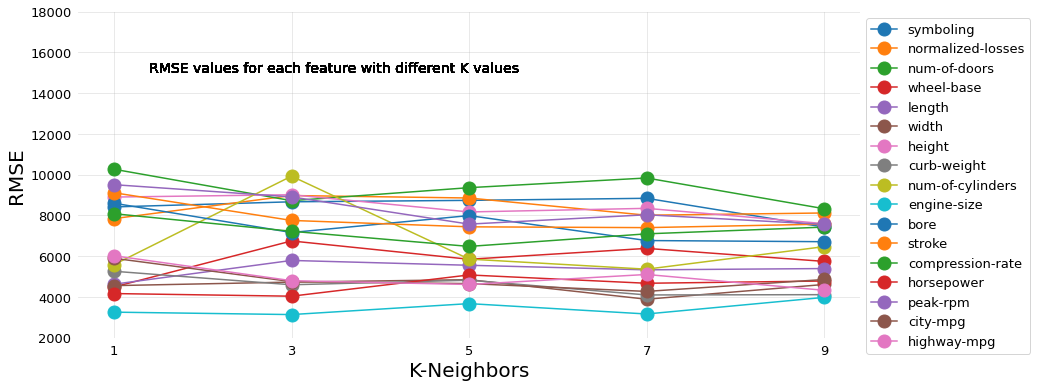

In [41]:
## Let's visualize the dataset above
%matplotlib inline
fig, ax = plt.subplots(figsize=(14,6))
for c in vis.index:      ## iterate through each index (feature)
    x = list('13579')    #k-neighbors
    y = list(vis.loc[c])
    ax.plot(x, y, marker='o', label=c, markersize=13)
    
    ax.set_xlabel('K-Neighbors', size=20)
    ax.set_ylabel('RMSE', size=20)
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.legend(bbox_to_anchor=(1, 1),prop={'size': 13})
    ax.tick_params(axis='both', labelsize=13)
    ax.set_ylim(2000, 18000)
    ax.grid(alpha=0.35)
    ax.tick_params(bottom=0, left=0) 
    ax.text(0.2, 15000, 'RMSE values for each feature with different K values', size=14)

## Findings:

Above are all the RMSE values for each feature with different K values. Cars cannot be priced by one attribute (feature). Thus, I will have to isolate the features that perform the best on its own. Then I will combined them together to see how they perform in conjunction.

In [42]:
## Let's sort the features by performace
rmse_mean = vis.mean(axis=1).sort_values()
rmse_mean

engine-size          3444.937896
width                4530.438233
horsepower           4551.179636
curb-weight          4581.643989
city-mpg             4890.591195
highway-mpg          4976.112578
length               5342.471295
wheel-base           5846.472180
num-of-cylinders     6643.448745
compression-rate     7265.253028
bore                 7449.688290
stroke               7859.888583
peak-rpm             8320.218873
normalized-losses    8364.004178
height               8409.551971
symboling            8421.573219
num-of-doors         9306.616399
dtype: float64

In [43]:
## Features with the best performance (relatively)
top2 = list(rmse_mean.index[:2])
top3 = list(rmse_mean.index[:3])
top4 = list(rmse_mean.index[:4])
top5 = list(rmse_mean.index[:5])
## for a sake of example let's see how top5 looks in DataFrame
vis.loc[top5]

,1,3,5,7,9
engine-size,3258.486106,3139.300789,3676.856328,3167.948234,3982.098024
width,4559.257298,4732.524009,4851.715494,3892.647942,4616.046424
horsepower,4170.054848,4040.972694,5083.278399,4675.453149,4786.139091
curb-weight,5264.290231,4601.351997,4824.958550,4101.881863,4115.737306
city-mpg,5901.143574,4756.283603,4659.527256,4275.722392,4860.279147


### Multivariate:
I will update the function to be multivariate where I can see how top2, top3, top4 and top5 features perform at different K values

In [44]:
## Function returns a DataFrame showing the perfomance of input features at different K values
def knn_train_test_v3(df, k, feature, target):
    
    freq = dict()   ## Create a frequency of k-neighbors with corresponding rmse values
    
    for i in k:
        
        np.random.seed(1) 
        
        shuffled_index = np.random.permutation(df.index)
        
        df = df.reindex(shuffled_index)
        
        knn = KNeighborsRegressor(n_neighbors=i)
        
        split = round(len(df)/2)
    
        train = df[:split]
    
        test = df[split:]

        knn.fit(train[feature], train[target])
    
        predictions = knn.predict(test[feature])
    
        mse = mean_squared_error(test[target], predictions)
    
        rmse = math.sqrt(mse)
        
        freq[i] = rmse
    
    ## use the frequency dictionary with the corresponding feature as an index to create a DataFrame
    df = pd.DataFrame(data=freq, index=['Top {}'.format(len(feature))])
    
    return df

knn_train_test_v3(new_df, range(1,26), top2, 'price')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Top 2,3719.49152,3223.801025,3693.704754,3292.834217,3524.585032,3706.815135,4251.374655,4716.42192,3644.778043,2845.020034,4655.112403,5156.956791,5205.130712,4759.739822,4361.750214,3385.484189,5896.291748,4019.784264,4436.970964,4943.215464,6513.607972,5954.484462,6598.622356,5687.741104,5007.989358


In [45]:
## Let's use the function above for each feature and create a combined DataFrame to visualize the results
combined_features = pd.DataFrame()
for f in [top2, top3, top4, top5]:
    result = knn_train_test_v3(new_df, range(1,26) , f, 'price')
    if len(combined_features) == 0:     ## if DataFrame is empty -> assign the first result to it 
        combined_features = result      ## this only happens once 
    else:                               ## concatinates everthing after t to an existing DataFrame 
        combined_features = pd.concat([combined_features, result])

In [46]:
combined_features

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Top 2,3719.491520,3223.801025,3693.704754,3292.834217,3524.585032,3706.815135,4251.374655,4716.421920,3644.778043,2845.020034,4655.112403,5156.956791,5205.130712,4759.739822,4361.750214,3385.484189,5896.291748,4019.784264,4436.970964,4943.215464,6513.607972,5954.484462,6598.622356,5687.741104,5007.989358
Top 3,3399.814810,2996.496783,3541.497622,2916.211700,3331.013892,3275.747721,3681.721680,4252.392505,3271.404100,2634.467993,4414.875268,4605.643156,4924.537112,4707.969825,4006.889024,3419.307709,5599.767438,4082.841560,4041.295159,4552.876931,6324.544018,5609.438802,6333.377251,5350.334250,4859.453628
Top 4,2952.725687,3002.935295,3260.153002,2424.477304,3065.925735,3645.108777,3918.510061,4216.371380,3338.580318,2619.546377,4404.560567,4526.675280,4779.657713,4654.669235,3979.811832,3343.354245,5551.668328,3877.160581,4077.697238,4569.622844,6190.691939,5538.029780,6263.775753,5284.546632,4738.147406
Top 5,2818.837066,3151.394464,3221.376027,2520.132891,3150.608090,3666.029743,3997.262428,4041.550021,3359.748149,2613.226642,4413.801237,4502.057479,4770.222881,4625.768935,3967.146906,3266.761762,5397.176927,3898.678881,3978.063176,4521.326419,6187.598122,5493.062027,6283.609885,5271.211102,4774.629444


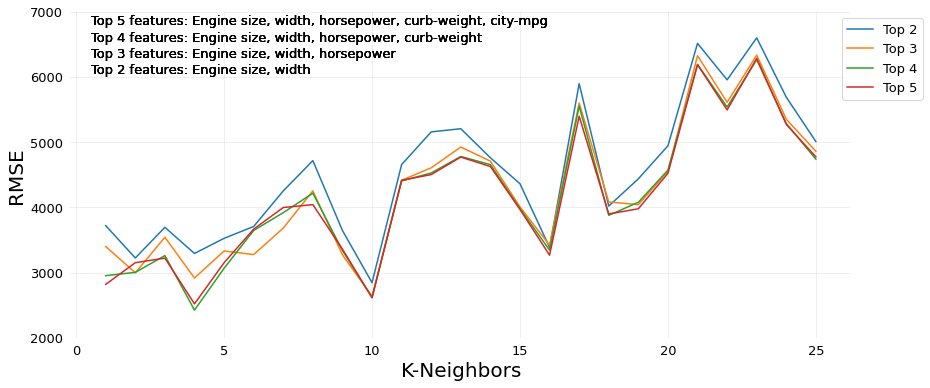

In [47]:
## Let's visualize the dataset above
%matplotlib inline
fig, ax = plt.subplots(figsize=(14,6))
for c in combined_features.index:      ## iterate through each index (feature)
    x = list(range(1,26))              ## k-neighbors
    y = list(combined_features.loc[c])
    ax.plot(x, y, label=c)
    
    ax.set_xlabel('K-Neighbors', size=20)
    ax.set_ylabel('RMSE', size=20)
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.legend(bbox_to_anchor=(1.1, 1),prop={'size': 13})
    ax.tick_params(axis='both', labelsize=13)
    ax.set_ylim(2000, 7000)
    ax.text(0.5, 6050, 'Top 2 features: Engine size, width', size=13)
    ax.text(0.5, 6300, 'Top 3 features: Engine size, width, horsepower', size=13)
    ax.text(0.5, 6550, 'Top 4 features: Engine size, width, horsepower, curb-weight', size=13)
    ax.text(0.5, 6800, 'Top 5 features: Engine size, width, horsepower, curb-weight, city-mpg', size=13)
    ax.grid(alpha=0.25)
    ax.tick_params(bottom=0, left=0) 

## Conclusion:

### Train/Test method

As you can see above, Top 4 and Top 5 features performed relatively better with K = 4. Using this model with features such as engine size, width, horsepower and curb weight while selecting 4 nearest neighbors would be relatively the most optimal choice for predicting the car prices. This, model is about 2300$ off from the actual price for each car. Although this is not the best prediction for the car price, I was able to see which features play a significant role for predicting car prices. 

## 2) Cross-validation:

Here I will split the dataframe into many folds and find the most optimal fold number while using K = 5 as a default. Also, I'm going to find the best combination of features like I did in Hold-out method

In [48]:
## Univariate
def cross_validation(df, feature, target):
    freq = dict()
    for i in range(2,21):
        kf = KFold(i, shuffle=True, random_state=1)
        knn = KNeighborsRegressor()
        mses = cross_val_score(knn, df[[feature]], df[target], scoring='neg_mean_squared_error', cv=kf)

        rmse = [math.sqrt(abs(i)) for i in mses]
        freq[i] = np.mean(rmse)
        
    df = pd.DataFrame(data=freq, index=[feature]) 
    return df

In [49]:
## Let's use the function for each feature and create a combined DataFrame to visualize the results
folds = pd.DataFrame()
for f in features:
    result = cross_validation(new_df, f, 'price')
    if len(folds) == 0:     ## if DataFrame is empty -> assign the first result to it 
        folds = result
    else:                 ## concatinates to an existing DataFrame 
        folds = pd.concat([folds, result])
folds

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
symboling,8446.059703,9736.220467,8971.172490,8947.855767,8392.946953,8165.444072,8532.445469,8529.316869,8810.021863,8322.869327,8562.568769,8351.161101,8029.827133,8348.951200,7980.765865,7835.205844,7724.346542,7703.789641,7673.470802
normalized-losses,7482.632289,7432.488865,6910.432610,7088.257745,7495.827796,7006.243134,6900.152199,7143.208070,6671.869661,6829.159927,7189.736248,6802.923101,7060.786714,6935.596409,6736.307557,7305.477169,6921.565646,6976.860790,6741.285411
num-of-doors,8741.298166,8766.418963,8227.974583,8600.978030,8257.115537,8804.163434,8575.956263,8301.688414,8340.702703,8210.926764,8320.268220,8199.385105,8217.354488,8356.849915,8158.635077,8324.290244,8393.037688,8071.157262,8237.496213
wheel-base,5709.567683,5854.387571,5601.049008,6047.925793,5945.565378,5640.418478,5744.523778,5750.226857,5725.179143,5608.288003,5653.415928,5738.476214,5535.696590,5499.080536,5615.526048,5408.127881,5411.109615,5463.740631,5519.869651
length,5645.803155,5250.257894,5217.793716,5674.682463,5314.853031,5386.227893,5320.497538,5402.296779,5344.389417,5400.831250,5242.509568,5246.406960,5217.396395,5093.982077,5097.462491,5064.692900,4974.892778,5071.995528,5056.619952
width,4480.755962,4244.068747,4305.112854,4198.202899,4207.797327,4186.165717,4319.527199,4346.119354,4209.420018,4245.503871,4096.533165,4007.158930,4110.137533,4372.576566,4102.218167,4142.461651,3979.748677,4067.359572,3940.192451
height,7735.811797,7773.613020,7723.547222,7602.563324,7704.673968,7789.826784,7667.115403,7525.105099,7702.821601,7382.160665,7515.146333,7424.444812,7447.566019,7406.896688,7392.291236,7364.653728,7309.008217,7404.922456,7231.594248
curb-weight,4130.915690,4174.606351,4331.335448,4310.710277,3965.294847,4259.436068,4059.026943,3951.624940,4234.188078,4045.167617,3979.880712,4082.618389,3980.883925,3927.162837,3948.736001,3862.383682,3981.290284,3929.857786,3992.474958
num-of-cylinders,7477.746320,7903.909239,7650.123002,7823.723533,8617.818949,7880.098746,8411.917450,8457.543638,8292.945392,8205.129740,8733.896975,8486.675395,8435.959423,8394.991576,8085.912461,8254.742537,8432.078621,8301.723505,8345.156648
engine-size,3364.285473,3202.929577,3287.796580,3169.886194,3219.961874,3145.579085,3141.847651,3119.901695,3043.502927,3057.069596,3076.543542,3074.185805,3061.568315,3119.813768,3034.114792,2971.087023,3005.787632,2991.785101,2986.658115


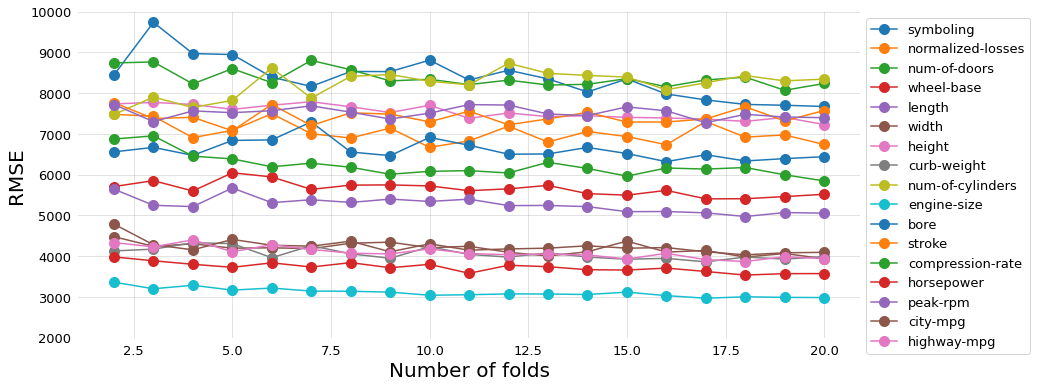

In [50]:
## Let's visualize the dataset above
%matplotlib inline
fig, ax = plt.subplots(figsize=(14,6))
for c in folds.index:      ## iterate through each index (feature)
    x = [i for i in range(2,21)]    
    y = list(folds.loc[c])
    ax.plot(x, y, marker='o', label=c, markersize=10)
    
    ax.set_xlabel('Number of folds', size=20)
    ax.set_ylabel('RMSE', size=20)
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.legend(bbox_to_anchor=(1, 1),prop={'size': 13})
    ax.tick_params(axis='both', labelsize=13)
    ax.set_ylim(2000, 10000)
    ax.grid(alpha=0.45)
    ax.tick_params(bottom=0, left=0) 

In [51]:
## Avarage performance of each feature across the folds
folds_mean = folds.mean(axis=1).sort_values()
## Isolate top 5 features 
folds_mean.head(5)

engine-size    3109.173934
horsepower     3726.528627
curb-weight    4060.399728
highway-mpg    4092.649399
width          4187.424245
dtype: float64

In [52]:
## combining top features together
t2 = list(folds_mean.index[:2])
t3 = list(folds_mean.index[:3])
t4 = list(folds_mean.index[:4])
t5 = list(folds_mean.index[:5])

In [53]:
## Multivariate
def cross_validation_v2(df, feature, target):
    freq = dict()
    for i in range(2,21):
        kf = KFold(i, shuffle=True, random_state=1)
        knn = KNeighborsRegressor()
        mses = cross_val_score(knn, df[feature], df[target], scoring='neg_mean_squared_error', cv=kf)

        rmse = [math.sqrt(abs(i)) for i in mses]
        freq[i] = np.mean(rmse)
    
    df = pd.DataFrame(data=freq, index=['Top {}'.format(len(feature))])
    return df

In [54]:
## Let's use the function for each feature and create a combined DataFrame to visualize the results
cross_comb = pd.DataFrame()
for f in [t2, t3, t4, t5]:
    result = cross_validation_v2(new_df, f, 'price')
    if len(cross_comb) == 0:     ## if DataFrame is empty -> assign the first result to it 
        cross_comb = result      ## this only happens once 
    else:                               ## concatinates everthing after t to an existing DataFrame 
        cross_comb = pd.concat([cross_comb, result])
cross_comb

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Top 2,3280.346853,3116.680636,3076.273049,2991.768447,2944.363570,3005.509280,2933.937322,2922.608892,2808.498398,2967.548497,2806.157478,2890.107716,2884.373635,2809.960675,2843.256950,2706.715847,2674.484167,2771.701964,2681.179066
Top 3,3422.028606,3414.718454,3307.393680,3250.772868,3158.723660,3323.341494,3146.203870,3207.807821,3179.771996,3171.973783,3199.623624,3210.695687,3201.421800,3111.407370,3123.266331,3062.375063,3072.398500,3065.467398,3081.257425
Top 4,3299.907917,3257.749184,3168.727484,3064.198769,2971.425350,3147.566568,2934.588564,3020.452641,2998.829232,2986.187188,3002.990753,3038.599183,3002.328107,2929.190138,2879.577908,2839.523294,2854.559562,2855.889826,2870.470983
Top 5,3383.961747,3211.129640,3107.268429,3066.296348,2993.408517,3054.668093,2957.965946,2846.038660,3031.800028,2879.123841,2933.450996,2965.114431,2899.232607,2886.565044,2865.073195,2835.345515,2782.742096,2805.621555,2811.005685


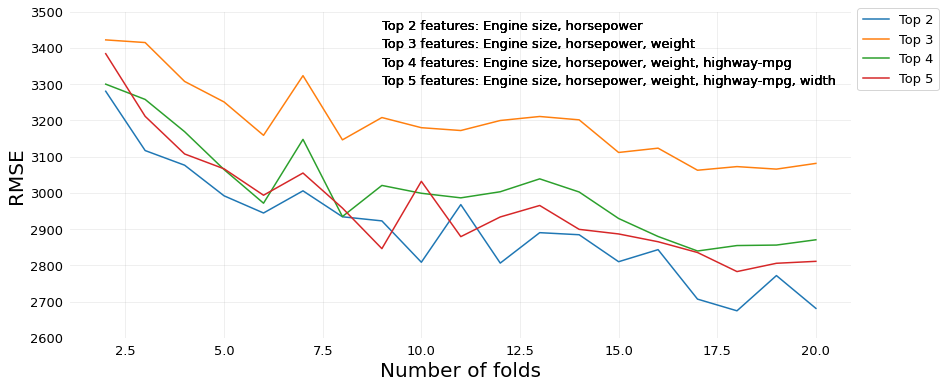

In [55]:
## Let's visualize the dataset above
%matplotlib inline
fig, ax = plt.subplots(figsize=(14,6))
for c in cross_comb.index:      ## iterate through each index (feature)
    x = list(range(2,21))              ## k-neighbors
    y = list(cross_comb.loc[c])
    ax.plot(x, y, label=c)
    
    ax.set_xlabel('Number of folds', size=20)
    ax.set_ylabel('RMSE', size=20)
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.legend(bbox_to_anchor=(1.12, 1.03),prop={'size': 13})
    
    ax.text(9, 3450, 'Top 2 features: Engine size, horsepower', size=13)
    ax.text(9, 3400, 'Top 3 features: Engine size, horsepower, weight', size=13)
    ax.text(9, 3350, 'Top 4 features: Engine size, horsepower, weight, highway-mpg', size=13)
    ax.text(9, 3300, 'Top 5 features: Engine size, horsepower, weight, highway-mpg, width', size=13) 

    ax.tick_params(axis='both', labelsize=13)
    ax.set_ylim(2600, 3500)
    ax.grid(alpha=0.25)
    ax.tick_params(bottom=0, left=0) 

## Conclusion:

As you can see above, 18 folds with 2 features performed relatively better than the rest of the combinations. I'm about 2700$ off the actual price for a car.

From both observations (hold-out, cross validation), I can conclude that using 4 or 5 as K value with features like engine size and horsepower we could predict the car's market price. It makes sense that out of all the features, engine size and horsepower are somewhat determinant of a car's price.

(c) Miradiz Rakhmatov